In [22]:
import numpy as np
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt

In [2]:
left_img = Image.open('input_images/part2/1/0015_rgb_left.png')
right_img = Image.open('input_images/part2/1/0015_rgb_right.png')

In [17]:
left_img = left_img.resize((180,100))
right_img = right_img.resize((180,100))

In [3]:
def ssd(a, b):
    return np.sum((a - b) ** 2)

In [5]:
def generate_box(img, x, y, wl, wr, hu, hd):
    w = wl + wr + 1
    h = hu + hd + 1
    start_x = x - wl
    start_y = y - hu
    col_list = []
    for j in range(h):
        row_list = []
        for i in range(w):
            row_list.append(img.getpixel((start_x+i,start_y+j)))
        col_list.append(row_list)
    return np.array(col_list)

In [19]:
def disp_map(img1, img2, window_size=5):
    width, height = img1.size
    s = window_size //2
    disp_arr = np.zeros((height,width))
    for y in range(height):
        for x in range(width):
            wl = min(x, s)
            wr = min(width-1-x, s)
            hu = min(y, s)
            hd = min(height-1-y, s)
            ref_box = generate_box(img1, x, y, wl, wr, hu, hd)
            min_cost = math.inf
            best_d = None
            for x2 in range(wl, width-wr, 1):
                sliding_box = generate_box(img2, x2, y, wl, wr, hu, hd)
                cost = ssd(ref_box, sliding_box)
                if cost < min_cost:
                    min_cost = cost
                    best_d = x2 - x
            disp_arr[y,x] = best_d
    return disp_arr

In [26]:
%time dp_map = disp_map(left_img, right_img, 9)

CPU times: user 5min 55s, sys: 3.92 s, total: 5min 59s
Wall time: 6min


In [27]:
dp_map

array([[ 0.,  0.,  0., ..., -9., -9., -9.],
       [ 0.,  0.,  0., ..., -8., -9., -9.],
       [ 0.,  0.,  0., ..., -8., -8., -9.],
       ...,
       [65.,  2.,  2., ..., -9., -9., -9.],
       [65., 65.,  5., ..., -9., -9., -9.],
       [65., 65., 65., ..., -9., -9., -9.]])

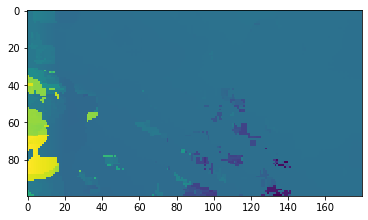

In [28]:
plt.imshow(dp_map)